Analyze Average Similarity Scores Within Clusters

Load Required Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


df = pd.read_csv("technical_support_with_clusters.csv")


In [ ]:
X = df[['Category_Enc', 'Type_Enc', 'Priority_Score']]

kmeans = KMeans(n_clusters=df['Cluster'].nunique(), random_state=42)
kmeans.fit(X)

distances = euclidean_distances(X, kmeans.cluster_centers_)

assigned_cluster_dist = distances[
    np.arange(len(distances)), df['Cluster']
]

df['Similarity_Score'] = 1 / (1 + assigned_cluster_dist)




In [ ]:
avg_similarity = df.groupby('Cluster')['Similarity_Score'].mean()
avg_similarity

,Similarity_Score
Cluster,
0,0.557637
1,0.462730
2,0.544842


Visualize Average Similarity by Cluster

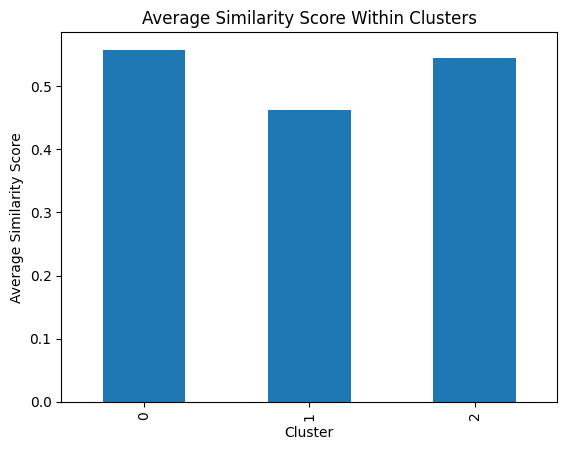

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
avg_similarity.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Average Similarity Score")
plt.title("Average Similarity Score Within Clusters")
plt.show()


Higher average similarity
→ Cluster is well-defined

Lower average similarity
→ Cluster may contain mixed issues

Compare Cluster Size vs Issue Type

In [ ]:
cluster_type_table = pd.crosstab(df['Cluster'], df['Type'])
cluster_type_table


Type,Change,Incident,Request
Cluster,,,
0,0,0,1077
1,417,225,162
2,0,0,449


Plot Cluster Size vs Issue Type

<Figure size 640x480 with 0 Axes>

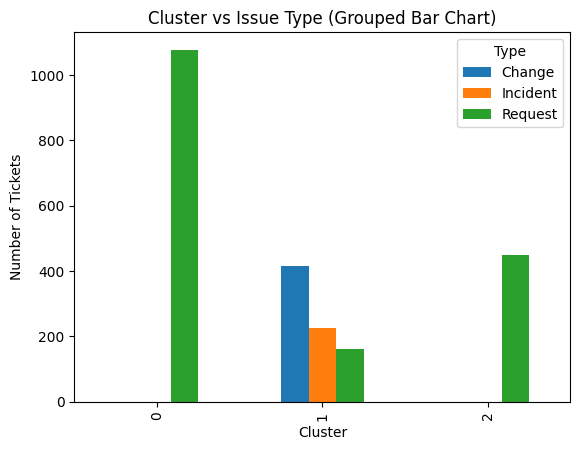

In [ ]:
plt.figure()
cluster_type_table.plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.title("Cluster vs Issue Type (Grouped Bar Chart)")
plt.show()

Visualize performance gaps using boxplots and scatter plots

Performance gaps =differences in resolution time across:

Priority levels

Agent Groups (queues)

Product Groups

Boxplot: Resolution Duration by Priority

<Figure size 640x480 with 0 Axes>

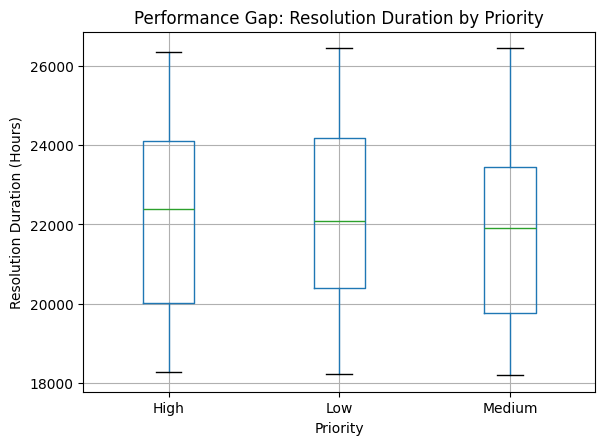

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("technical_support_with_clusters.csv")

plt.figure()
df.boxplot(column='Resolution_Duration', by='Priority')
plt.xlabel("Priority")
plt.ylabel("Resolution Duration (Hours)")
plt.title("Performance Gap: Resolution Duration by Priority")
plt.suptitle("")
plt.show()


Boxplot: Resolution Duration by Agent Group (Queue)

<Figure size 640x480 with 0 Axes>

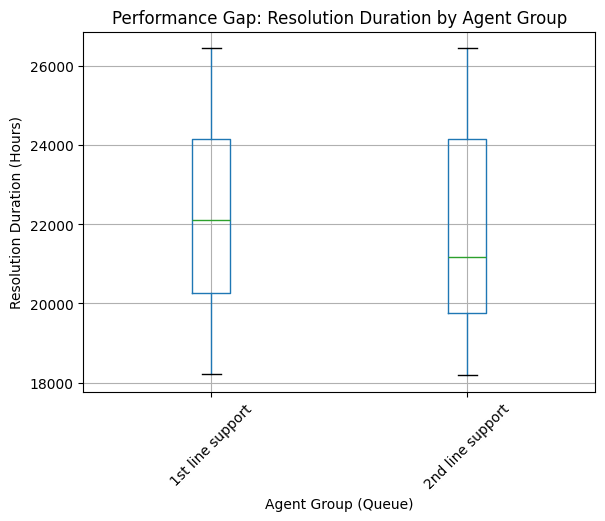

In [ ]:
plt.figure()
df.boxplot(column='Resolution_Duration', by='Agent Group')
plt.xlabel("Agent Group (Queue)")
plt.ylabel("Resolution Duration (Hours)")
plt.title("Performance Gap: Resolution Duration by Agent Group")
plt.xticks(rotation=45)
plt.suptitle("")
plt.show()


Scatter Plot: Resolution Duration vs Priority Score

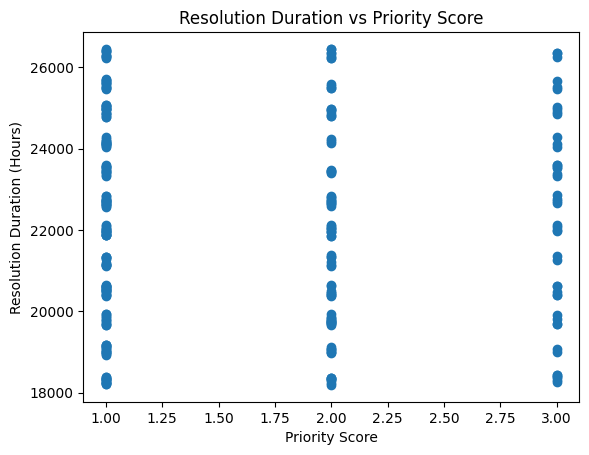

In [ ]:
plt.figure()
plt.scatter(df['Priority_Score'], df['Resolution_Duration'])
plt.xlabel("Priority Score")
plt.ylabel("Resolution Duration (Hours)")
plt.title("Resolution Duration vs Priority Score")
plt.show()


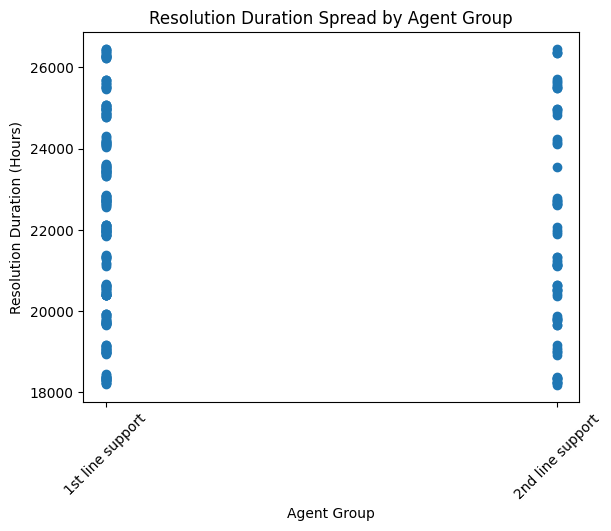

In [ ]:
plt.figure()
plt.scatter(df['Agent Group'], df['Resolution_Duration'])
plt.xlabel("Agent Group")
plt.ylabel("Resolution Duration (Hours)")
plt.title("Resolution Duration Spread by Agent Group")
plt.xticks(rotation=45)
plt.show()
